In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statistics
from scipy import stats
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"E:\Users\laisu\Downloads\kc_house_data.csv",dtype={'locationid':np.int64})

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df['price'] = df['price'].astype(np.int64)
df['bathrooms'] = df['bathrooms'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
df['lat'] = df['lat'].astype(np.int64)
df['long'] = df['long'].astype(np.int64)

In [6]:
df['date'] = df['date'].str.strip('0')
df['date'] = df['date'].str.strip('T')
df['date'] = df['date'].astype(np.int64)
df['date']

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             21613 non-null  int64
 1   date           21613 non-null  int64
 2   price          21613 non-null  int64
 3   bedrooms       21613 non-null  int64
 4   bathrooms      21613 non-null  int64
 5   sqft_living    21613 non-null  int64
 6   sqft_lot       21613 non-null  int64
 7   floors         21613 non-null  int64
 8   waterfront     21613 non-null  int64
 9   view           21613 non-null  int64
 10  condition      21613 non-null  int64
 11  grade          21613 non-null  int64
 12  sqft_above     21613 non-null  int64
 13  sqft_basement  21613 non-null  int64
 14  yr_built       21613 non-null  int64
 15  yr_renovated   21613 non-null  int64
 16  zipcode        21613 non-null  int64
 17  lat            21613 non-null  int64
 18  long           21613 non-null  int64
 19  sqft

In [8]:
df.shape

(21613, 21)

In [9]:
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)
print(missing_percentages)

id               0.0
grade            0.0
sqft_living15    0.0
long             0.0
lat              0.0
zipcode          0.0
yr_renovated     0.0
yr_built         0.0
sqft_basement    0.0
sqft_above       0.0
condition        0.0
date             0.0
view             0.0
waterfront       0.0
floors           0.0
sqft_lot         0.0
sqft_living      0.0
bathrooms        0.0
bedrooms         0.0
price            0.0
sqft_lot15       0.0
dtype: float64


In [10]:
total_missing_percentage = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
print("Data Sparsity: {:.2f}%".format(total_missing_percentage))

Data Sparsity: 0.00%


In [11]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2.014390e+07,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.0,-121.931754,1986.552492,12768.455652
std,2.876566e+09,4.436582e+03,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.0,0.252173,685.391304,27304.179631
min,1.000102e+06,2.014050e+07,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.0,-122.000000,399.000000,651.000000
25%,2.123049e+09,2.014072e+07,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.0,-122.000000,1490.000000,5100.000000
50%,3.904930e+09,2.014102e+07,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.0,-122.000000,1840.000000,7620.000000
75%,7.308900e+09,2.015022e+07,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.0,-122.000000,2360.000000,10083.000000
max,9.900000e+09,2.015053e+07,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.0,-121.000000,6210.000000,871200.000000


In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: xlabel='bedrooms', ylabel='price'>

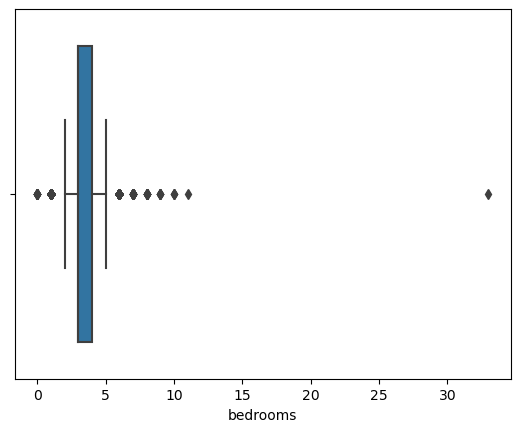

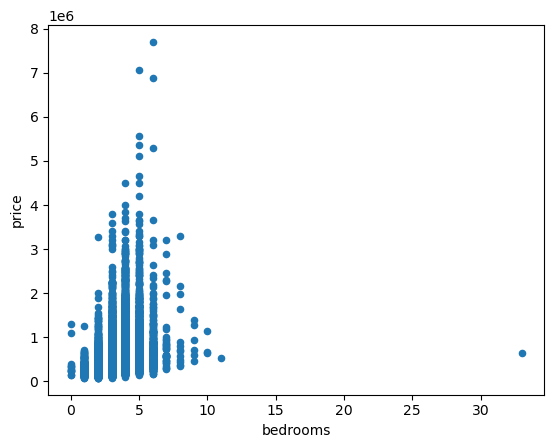

In [14]:
boxplot=sns.boxplot(x= 'bedrooms',data=df)
df.plot.scatter(x = 'bedrooms', y = 'price')

<Axes: xlabel='bathrooms', ylabel='price'>

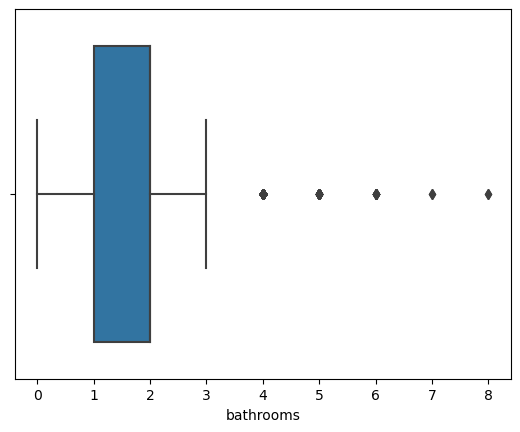

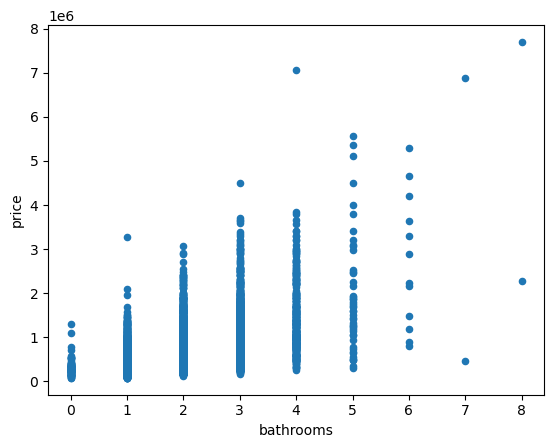

In [15]:
boxplot=sns.boxplot(x= 'bathrooms',data=df)
df.plot.scatter(x = 'bathrooms', y = 'price')

<Axes: xlabel='sqft_living', ylabel='price'>

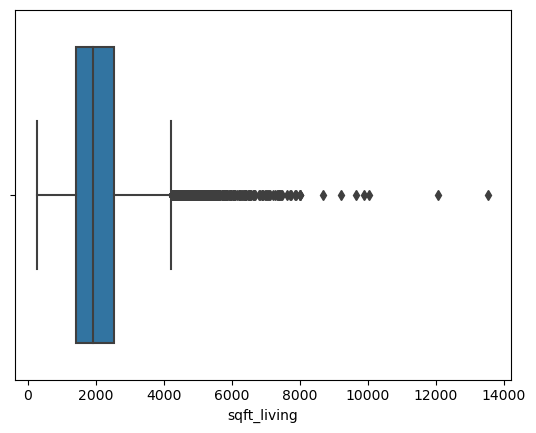

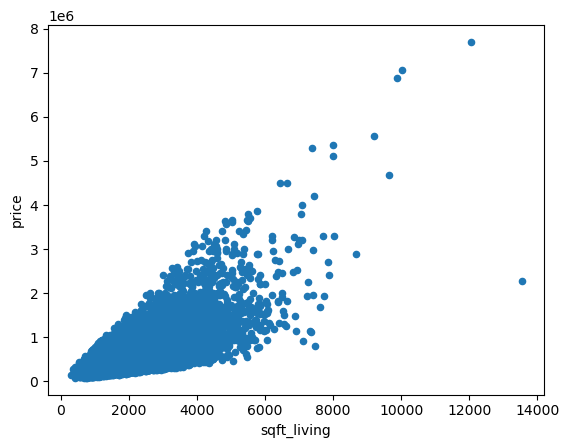

In [16]:
boxplot=sns.boxplot(x= 'sqft_living',data=df)
df.plot.scatter(x = 'sqft_living', y = 'price')

<Axes: xlabel='sqft_lot', ylabel='price'>

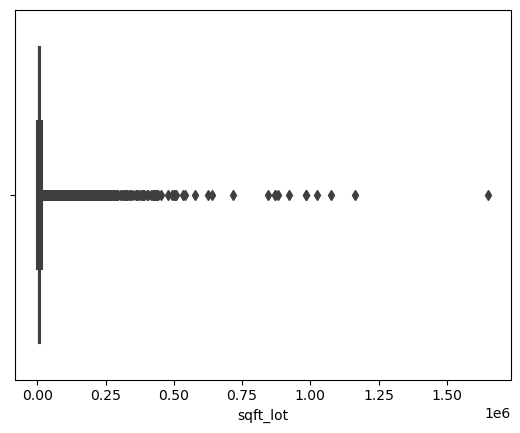

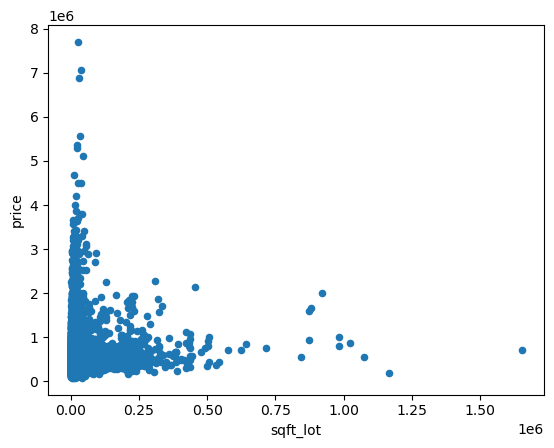

In [17]:
boxplot=sns.boxplot(x= 'sqft_lot',data=df)
df.plot.scatter(x = 'sqft_lot', y = 'price')

<Axes: xlabel='floors', ylabel='price'>

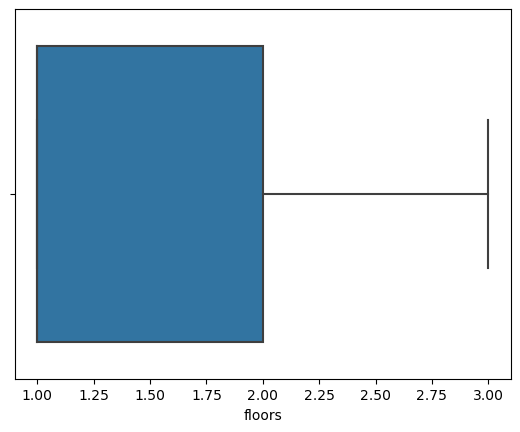

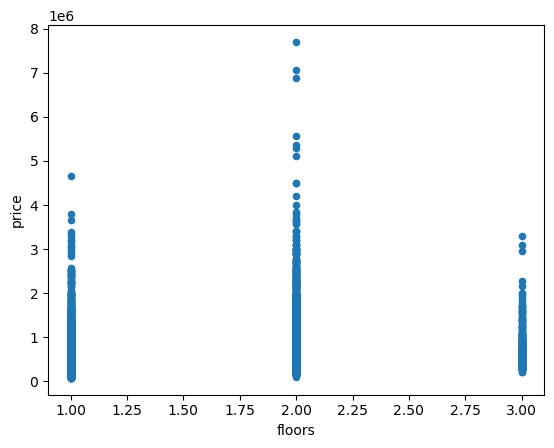

In [18]:
boxplot=sns.boxplot(x= 'floors',data=df)
df.plot.scatter(x = 'floors', y = 'price')

<Axes: xlabel='sqft_above', ylabel='price'>

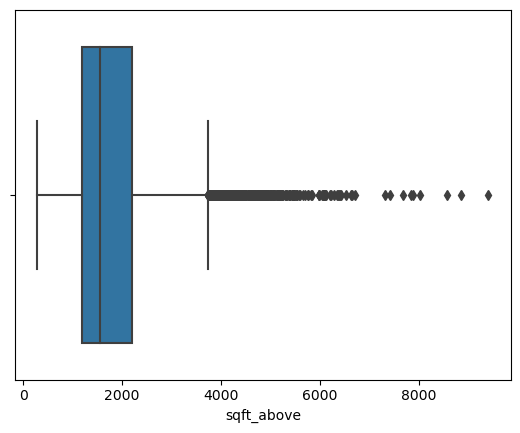

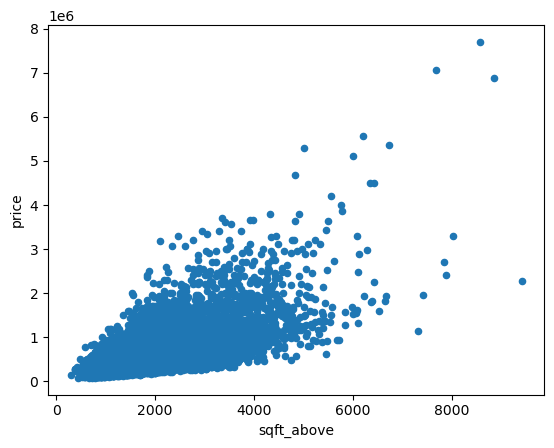

In [19]:
boxplot=sns.boxplot(x= 'sqft_above',data=df)
df.plot.scatter(x = 'sqft_above', y = 'price')

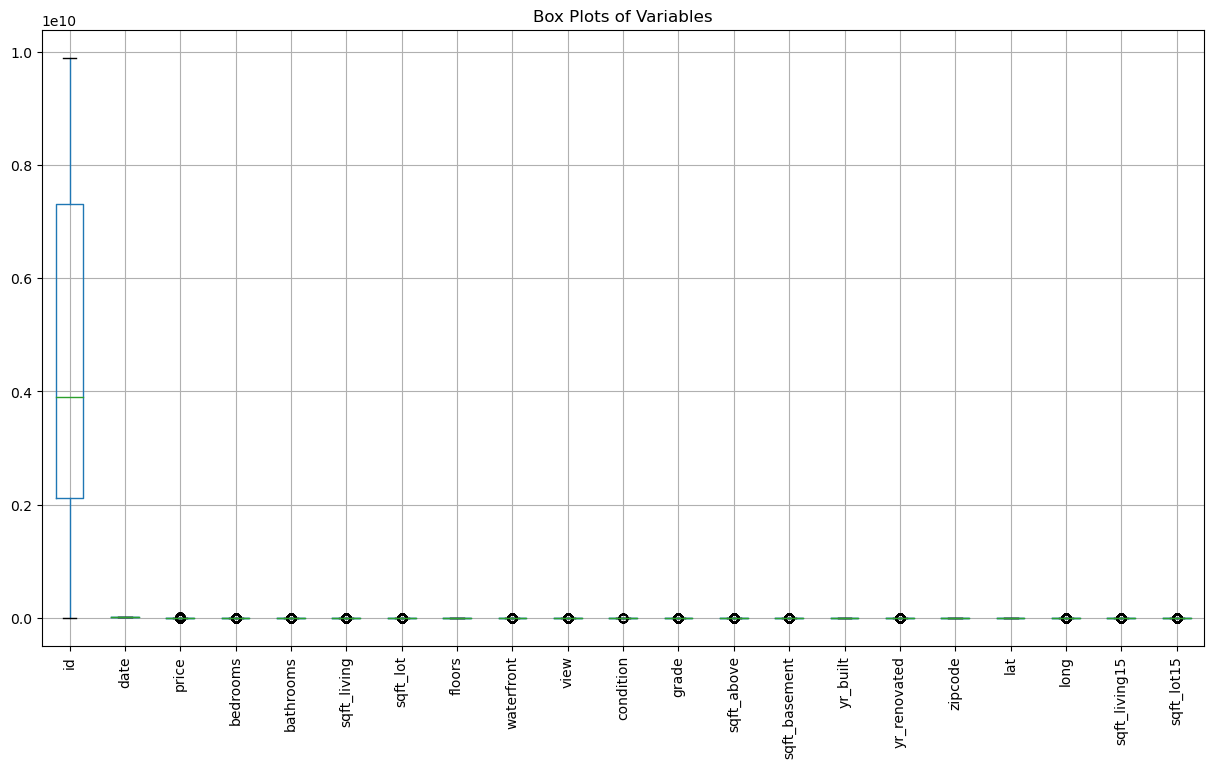

In [20]:
df.boxplot(figsize=(15, 8))
plt.title("Box Plots of Variables")
plt.xticks(rotation=90)
plt.show()

In [21]:
#drop unnecessary variables
df = df.drop(columns=['id', 'long', 'lat'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           21613 non-null  int64
 1   price          21613 non-null  int64
 2   bedrooms       21613 non-null  int64
 3   bathrooms      21613 non-null  int64
 4   sqft_living    21613 non-null  int64
 5   sqft_lot       21613 non-null  int64
 6   floors         21613 non-null  int64
 7   waterfront     21613 non-null  int64
 8   view           21613 non-null  int64
 9   condition      21613 non-null  int64
 10  grade          21613 non-null  int64
 11  sqft_above     21613 non-null  int64
 12  sqft_basement  21613 non-null  int64
 13  yr_built       21613 non-null  int64
 14  yr_renovated   21613 non-null  int64
 15  zipcode        21613 non-null  int64
 16  sqft_living15  21613 non-null  int64
 17  sqft_lot15     21613 non-null  int64
dtypes: int64(18)
memory usage: 3.0 MB


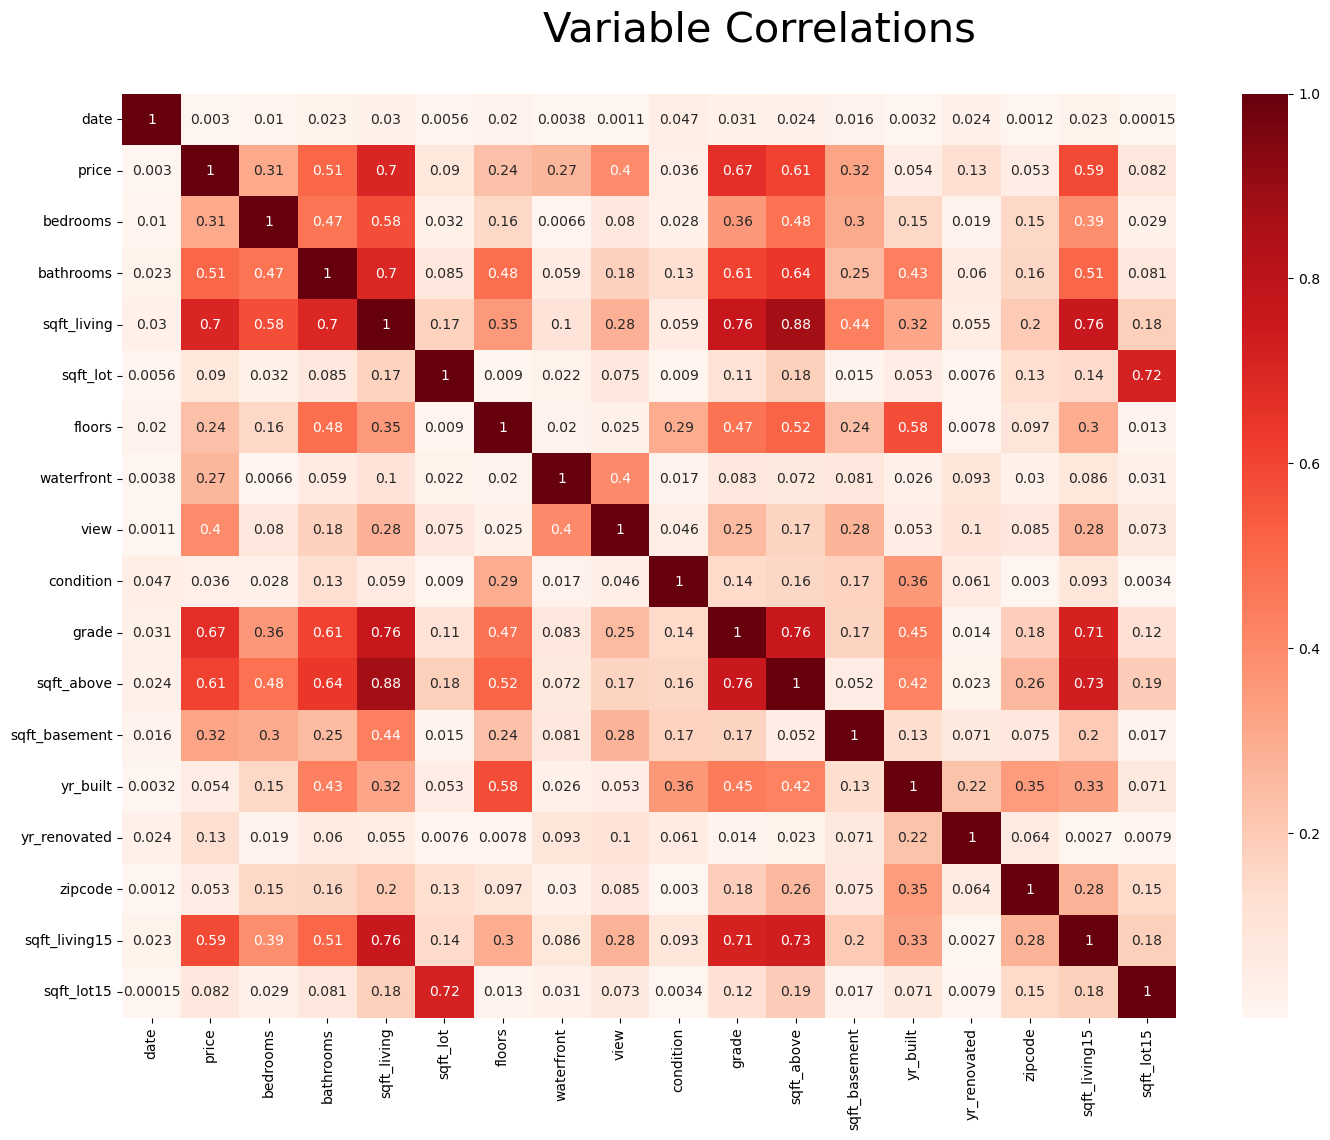

In [23]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [24]:
df['price'] = np.log(df['price'])

In [25]:
from scipy.stats import kstest, norm

np.random.seed(123)
sample = np.random.normal(loc=0, scale=1, size=100)
ks_stat, p_value = kstest(sample, norm.cdf)
print("Kolmogorov-Smirnov test:")
print("KS statistic:", ks_stat)
print("p-value:", p_value)

Kolmogorov-Smirnov test:
KS statistic: 0.10665330380822602
p-value: 0.19116286378085368


In [26]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [27]:
y = df['price']
X = df[['date', 'bedrooms', 'bathrooms', 'sqft_living',
        'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15',
          ]].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     3795.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:21:26   Log-Likelihood:                -7324.7
No. Observations:               21613   AIC:                         1.467e+04
Df Residuals:                   21604   BIC:                         1.474e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
date           3.272e-06   5.21e-07      6.279

In [28]:
#checking for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['date', 'bedrooms', 'bathrooms', 'sqft_living',
        'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15',]].assign(const=1)
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

         feature           VIF
0           date  1.001351e+00
1       bedrooms  1.586132e+00
2      bathrooms  2.065124e+00
3    sqft_living           inf
4           view  1.168405e+00
5          grade  2.972535e+00
6     sqft_above           inf
7  sqft_basement           inf
8  sqft_living15  2.729006e+00
9          const  2.064572e+07


In [29]:
#Removing variables with high VIF
y = df['price']
X = df[['bedrooms', 'bathrooms',
        'view', 'grade',
        'sqft_living15']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     5397.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:21:27   Log-Likelihood:                -8052.0
No. Observations:               21613   AIC:                         1.612e+04
Df Residuals:                   21607   BIC:                         1.616e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms          0.0317      0.003     10.673

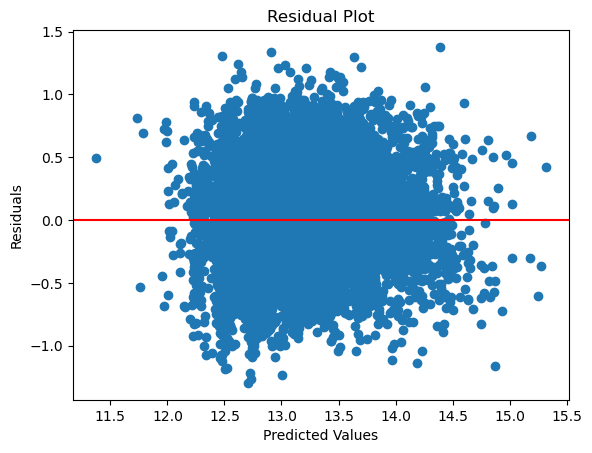

In [30]:
model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = model.predict(sm.add_constant(X))
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Text(0.5, 0.98, 'QQ plot for residual normality check')

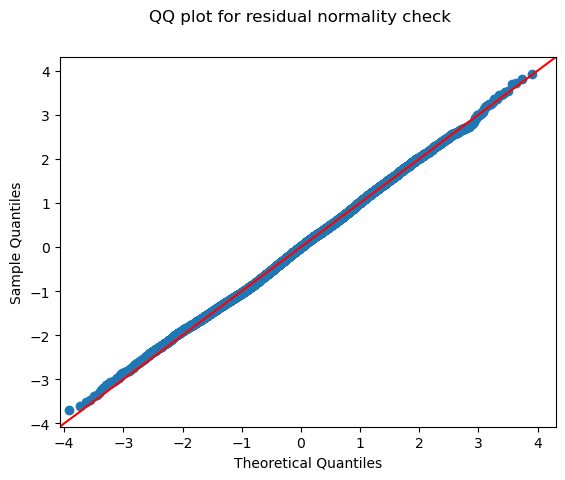

In [31]:
fig_qq = sm.graphics.qqplot(model.resid, line='45', fit=True,)
fig_qq.suptitle('QQ plot for residual normality check')

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
scores = cross_val_score(reg, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.55267687 0.54545217 0.53100258 0.56259869 0.57370005]
Mean score: 0.5530860724917174


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
train, test = train_test_split(df,test_size=.25,shuffle=True)

In [34]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [36]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [38]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2
print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)

Mean Squared Error Train: 1.3315894582158466e-08
Mean Squared Error Test: 1.1979870444175422e-07


In [39]:
df.to_csv (r"E:\Users\laisu\Documents\data2142.csv")